<a href="https://colab.research.google.com/github/raj-vijay/dl/blob/master/05_Linear_Regression_Models_in_TensorFlow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**The linear regression model**

A linear regression model assumes a linear relationship:

price = intercept + size ∗ slope + error

This is an example of a univariate regression. There is only one feature, size .
Multiple regression models have more than one feature. E.g. size and location

**King County Housing Dataset**

Online property companies offer valuations of houses using machine learning techniques. The aim of this report is to predict the house sales in King County, Washington State, USA using Multiple Linear Regression (MLR). The dataset consisted of historic data of houses sold between May 2014 to May 2015. We will predict the sales of houses in King County with an accuracy of at least 75-80% and understand which factors are responsible for higher property value - $650K and above.”


The dataset consists of house prices from King County an area in the US State of Washington, this data also covers Seattle. The dataset was obtained from Kaggle*. This data was published/released under CC0*: Public Domain. Unfortunately, the user has not indicated the source of the data. Please find the citation and database description in the Glossary and Bibliography. 

The dataset consisted of 21 variables and 21613 observations.

Installing Kaggle Package to access the diabetes dataset from Kaggle.

In [0]:
!pip install kaggle

Make .kaggle directory under root to import the Kaggle Authentication JSON.

In [0]:
!mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


Change file path to root/.kaggle/kaggle.json

In [0]:
!cp /content/kaggle.json ~/.kaggle/kaggle.json

Chmod 600 (chmod a+rwx,u-x,g-rwx,o-rwx) sets permissions so that, (U)ser / owner can read, can write and can't execute. (G)roup can't read, can't write and can't execute. (O)thers can't read, can't write and can't execute.

In [0]:
!chmod 600 /root/.kaggle/kaggle.json

Download housing dataset from Kaggle!

In [0]:
!kaggle datasets download -d shivachandel/kc-house-data

kc-house-data.zip: Skipping, found more recently modified local copy (use --force to force download)


**Load data using pandas**

In [0]:
# Import pandas under the alias pd
import pandas as pd
import numpy as np

# Assign the path to a string variable named data_path
data_path = '/content/kc-house-data.zip'

# Load the dataset as a dataframe named housing
housing = pd.read_csv(data_path, compression='zip')


In [0]:
housing.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180.0,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170.0,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770.0,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050.0,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680.0,0,1987,0,98074,47.6168,-122.045,1800,7503


In [0]:
price = housing['price']

In [0]:
# Print the price column of housing
print(housing['price'])

0        221900.0
1        538000.0
2        180000.0
3        604000.0
4        510000.0
           ...   
21608    360000.0
21609    400000.0
21610    402101.0
21611    400000.0
21612    325000.0
Name: price, Length: 21613, dtype: float64


In [0]:
# Print the price column of housing
predictions = housing['price']

**Linear regression in TensorFlow**

In [0]:
import matplotlib.pyplot as plt

def plot_results(intercept, slope):
	size_range = np.linspace(6,14,100)
	price_pred = [intercept+slope*s for s in size_range]
	plt.scatter(size_log, price_log, color = 'black')
	plt.plot(size_range, price_pred, linewidth=3.0, color='red')
	plt.xlabel('log(size)')
	plt.ylabel('log(price)')
	plt.title('Scatterplot of data and fitted regression line')
	plt.show()

In [0]:
import tensorflow as tf

In [0]:
# Define the targets and features
price = np.array(housing['price'], np.float32)
size = np.array(housing['sqft_living'], np.float32)
# Define the intercept and slope
intercept = tf.Variable(0.1, np.float32)
slope = tf.Variable(0.1, np.float32)

In [0]:
# Define a linear regression model
def linear_regression(intercept, slope, features = size):
  return intercept + features*slope

In [0]:
# Compute the predicted values and loss
def loss_function(intercept, slope, targets = price, features = size):
  predictions = linear_regression(intercept, slope)
  return tf.keras.losses.mse(targets, predictions)

In [0]:
# Define an optimization operation
opt = tf.keras.optimizers.Adam()

In [0]:
# Minimize the loss function and print the loss
for j in range(1000):
  opt.minimize(lambda: loss_function(intercept, slope),\
  var_list=[intercept, slope])
  print(loss_function(intercept, slope))

tf.Tensor(426196570000.0, shape=(), dtype=float32)
tf.Tensor(426193780000.0, shape=(), dtype=float32)
tf.Tensor(426191160000.0, shape=(), dtype=float32)
tf.Tensor(426188370000.0, shape=(), dtype=float32)
tf.Tensor(426185620000.0, shape=(), dtype=float32)
tf.Tensor(426182930000.0, shape=(), dtype=float32)
tf.Tensor(426180280000.0, shape=(), dtype=float32)
tf.Tensor(426177530000.0, shape=(), dtype=float32)
tf.Tensor(426174800000.0, shape=(), dtype=float32)
tf.Tensor(426172060000.0, shape=(), dtype=float32)
tf.Tensor(426169400000.0, shape=(), dtype=float32)
tf.Tensor(426166650000.0, shape=(), dtype=float32)
tf.Tensor(426163860000.0, shape=(), dtype=float32)
tf.Tensor(426161180000.0, shape=(), dtype=float32)
tf.Tensor(426158520000.0, shape=(), dtype=float32)
tf.Tensor(426155840000.0, shape=(), dtype=float32)
tf.Tensor(426153050000.0, shape=(), dtype=float32)
tf.Tensor(426150360000.0, shape=(), dtype=float32)
tf.Tensor(426147600000.0, shape=(), dtype=float32)
tf.Tensor(426144900000.0, shape

In [0]:
# Print the trained parameters
print(intercept.numpy(), slope.numpy())

1.0991763 1.0991884


**Set up a linear regression**

A univariate linear regression identifies the relationship between a single feature and the target tensor. 

Now, we will use a property's lot size and price. We will take the natural logarithms of both tensors, which are available as price_log and size_log.

Now we define the model and the loss function, and then evaluate the loss function for two different values of intercept and slope. 

The predicted values are given by intercept + features*slope.

In [0]:
# Define the targets and features
price_log = np.log(np.array(housing['price'], np.float32))
size_log = np.log(np.array(housing['sqft_living'], np.float32))

In [0]:
# Define a linear regression model
def linear_regression(intercept, slope, features = size_log):
	return intercept + slope*features

# Set loss_function() to take the variables as arguments
def loss_function(intercept, slope, features = size_log, targets = price_log):
	# Set the predicted values
	predictions = linear_regression(intercept, slope, features)
    
    # Return the mean squared error loss
	return keras.losses.mse(targets, predictions)

# Compute the loss for different slope and intercept values
print(loss_function(0.1, 0.1).numpy())
print(loss_function(0.1, 0.5).numpy())

148.91296
84.30901


**Train a linear model**

In [0]:
# Initialize an adam optimizer
opt = keras.optimizers.Adam(0.5)

for j in range(100):
	# Apply minimize, pass the loss function, and supply the variables
	opt.minimize(lambda: loss_function(intercept, slope), var_list=[intercept, slope])

	# Print every 10th value of the loss
	if j % 10 == 0:
		print(loss_function(intercept, slope).numpy())


18.309134
2.6758628
1.6817745
0.3240044
0.17666166
0.18073586
0.17638882
0.17507626
0.17591643
0.17482367


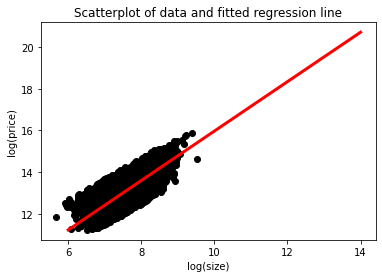

In [0]:
# Plot data and regression line
plot_results(intercept, slope)

**Multiple linear regression**

In most cases, performing a univariate linear regression will not yield a model that is useful for making accurate predictions. 

Here we will perform a multiple regression, which uses more than one feature.

In [0]:
def print_results(params):
    	return print('loss: {:0.3f}, intercept: {:0.3f}, slope_1: {:0.3f}, slope_2: {:0.3f}'
      .format(loss_function(params).numpy(), params[0].numpy(), params[1].numpy(), params[2].numpy()))

In [0]:
# Define a vector of parameters
params = tf.Variable([0.15999995, 0.10999998, 0.07999992], dtype=float32)

In [0]:
bedrooms = np.array(housing['bedrooms'], np.float32)

In [0]:
# Define the linear regression model
def linear_regression(params, feature1 = size_log, feature2 = bedrooms):
	return params[0] + feature1*params[1] + feature2*params[2]

# Define the loss function
def loss_function(params, targets = price_log, feature1 = size_log, feature2 = bedrooms):
	# Set the predicted values
	predictions = linear_regression(params, feature1, feature2)
  
	# Use the mean absolute error loss
	return keras.losses.mae(targets, predictions)

# Define the optimize operation
opt = keras.optimizers.Adam()

# Perform minimization and print trainable variables
for j in range(10):
	opt.minimize(lambda: loss_function(params), var_list=[params])
	print_results(params)

loss: 11.645, intercept: 0.172, slope_1: 0.122, slope_2: 0.092
loss: 11.633, intercept: 0.173, slope_1: 0.123, slope_2: 0.093
loss: 11.621, intercept: 0.174, slope_1: 0.124, slope_2: 0.094
loss: 11.609, intercept: 0.175, slope_1: 0.125, slope_2: 0.095
loss: 11.597, intercept: 0.176, slope_1: 0.126, slope_2: 0.096
loss: 11.585, intercept: 0.177, slope_1: 0.127, slope_2: 0.097
loss: 11.573, intercept: 0.178, slope_1: 0.128, slope_2: 0.098
loss: 11.561, intercept: 0.179, slope_1: 0.129, slope_2: 0.099
loss: 11.549, intercept: 0.180, slope_1: 0.130, slope_2: 0.100
loss: 11.537, intercept: 0.181, slope_1: 0.131, slope_2: 0.101
